## Robust PCA

信号矩阵为$X$，RPCA将信号矩阵分解为信号和异常噪声之和$X = S + N$，其中信号是低秩的，噪声是稀疏的！ 
RPCA优化如下问题

$$
\min_{N} ||X - N||_* + ||N||_1
$$

其中核范数$||A||_* = tr \sqrt{A^T A}$作为秩函数的凸近似，l1范数作为0范数的凸近似。

In [67]:
import tensorflow as tf
import numpy as np

dshape = 128, 784
k = 50
x = tf.placeholder(dtype=tf.float64, shape=dshape)
u = tf.placeholder(dtype=tf.float64, shape=())
n = tf.Variable(np.random.randn(dshape[0], dshape[1]))
U = tf.Variable(np.random.randn(dshape[0], k))
V = tf.Variable(np.random.randn(k, dshape[1]))
loss = tf.reduce_sum((tf.matmul(U, V) - x)**2) + tf.norm(n, ord=1)*u

In [68]:
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss)

In [69]:
sess = tf.Session()

In [70]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [86]:
X, y = mnist.train.next_batch(128)
idx = np.random.rand(X.shape[0], X.shape[1])>0.95 
X[idx] = 1.0

In [90]:
for i in range(10000):    
    lossi, _ = sess.run([loss, train_op], feed_dict={x : X, u : 1.0})
    if i % 100 == 0:
        print '\r[%d] loss = %f' % (i, lossi) ,

[9900] loss = 2709.377806


In [95]:
Xp, N = sess.run([tf.matmul(U, V), n])

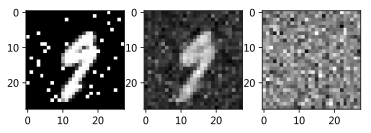

In [97]:
plt.subplot(131)
i = np.random.randint(0, X.shape[0])
plt.imshow(X[i].reshape((28,28)), cmap='gray')
plt.subplot(132)
plt.imshow(Xp[i].reshape((28,28)), cmap='gray')
plt.subplot(133)
plt.imshow(N[i].reshape((28,28)), cmap='gray')

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
X, y = mnist.train.next_batch(128)

In [25]:
X.max()

1.0

In [9]:
print X.shape

(128, 784)


In [7]:
import matplotlib.pyplot as plt

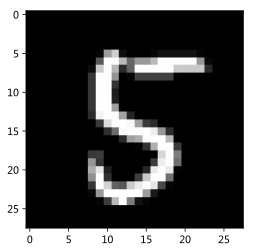

In [16]:
plt.imshow(X[0].reshape((28,28)), cmap='gray')

In [14]:
28*28

784

In [143]:
X = tf.placeholder(dtype=tf.float64, shape=(1000, 1000))
U = tf.Variable(initial_value=np.random.randn(1000,10))
V = tf.Variable(initial_value=np.random.randn(10, 1000))
N = tf.Variable(initial_value=np.random.randn(1000, 1000))
loss = tf.reduce_mean((X - tf.matmul(U, V) - N)**2) + tf.reduce_mean(U**2) + tf.reduce_mean(V**2) + 1e3*tf.reduce_mean(tf.abs(N))

In [144]:
opt = tf.train.AdamOptimizer(learning_rate=1)
train_op = opt.minimize(loss)

In [145]:
Ndata = np.random.rand(1000, 1000)
Ndata[Ndata<0.95] = 0.0

Xdata = np.matmul(np.random.randn(1000,10), np.random.randn(10, 1000)) + Ndata

init_op = tf.global_variables_initializer()
sess.run(init_op)

In [146]:
for i in range(1000):
    li, _ = sess.run([loss, train_op], feed_dict={X : Xdata})
    print '\r step %d loss = %f' % (i, li),

 step 999 loss = 108.810073


In [147]:
Ui, Vi, Ni = sess.run([U, V, N])

In [148]:
np.matmul(Ui, Vi), Xdata, Ni

(array([[-2.12549528,  0.18397024,  2.67355174, ...,  1.5407152 ,
         -0.48151788,  0.49811356],
        [-1.11092384,  0.1942735 , -1.31377499, ..., -1.56975503,
         -4.09537026, -1.77603979],
        [ 0.22219927, -2.03415383, -1.62947095, ..., -3.50014383,
          1.39256586,  4.92502912],
        ..., 
        [-1.312847  , -1.29101306, -2.20710227, ..., -0.84533155,
         -1.68106663, -0.43500866],
        [-1.93310931, -4.40157348, -2.70188714, ..., -2.98486241,
          0.3123372 ,  4.09745557],
        [-2.68874431,  3.43265452, -0.41806723, ...,  0.70343084,
         -0.71734419, -1.29127556]]),
 array([[-2.42303664,  0.22336429,  3.04684201, ...,  1.76800501,
         -0.53756442,  0.52533869],
        [-1.27853369,  0.29089366, -1.46405768, ..., -1.77448311,
         -4.61446184, -1.99393669],
        [ 0.23019041, -2.28461376, -0.79498462, ..., -3.84837927,
          1.53901921,  6.42734688],
        ..., 
        [-1.48925182, -1.43680163, -2.55638757, ...,